In [ ]:
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sms
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from pandas_profiling import ProfileReport
 
#recurso da função pandas para ler o csv
consumo = pd.read_csv('Consumo.csv')

Text(0.5, 1.0, ' Salário Anual x Score')

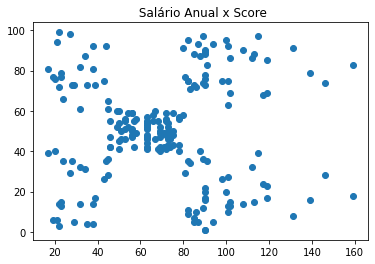

In [ ]:
# Plotando o gráfico de salário x score

plt.scatter(x = 'Salario Anual (milhares)', y = 'Score Gastos (0-100)', data = consumo) # Gráfico de dispersão
plt.title(' Salário Anual x Score') # título do gráfico


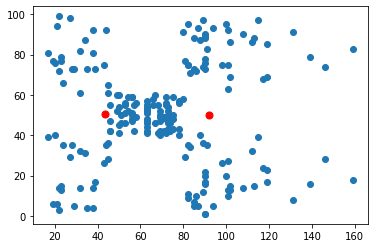

In [ ]:
# Executando KMeans com 2 clusters

# Extraindo os valores de todas as linhas das colunas Salário e Score
X2 = consumo[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values
# A função iloc serve para ler os dados específicos alocados nas linhas da coluna desejada. Já a propriedade [:,:] percorre e lê todos os valores alocados nas linhas das colunas especificadas
# Dê um print(X2) para entender melhor.
# Essa linha vai servir para tratar a clusterização

# Criando os clusters
kmeans = KMeans(n_clusters=2, init="k-means++", max_iter=300, n_init=10)
# n_clusters = quantidade de clusters que quer gerar, bem como o número de centroides
# init='kmeans++' = executa de forma mais ágil a convergência em cada cluster
# n_init=10 = Número de vezes padrão que o algoritmo irá percorrer cada centroide
# max_iter = 300 = Número máximo de iterações que o algoritmo irá fazer por cada leitura do cluster. 

#Computando o centro dos clusters e predizendo o índice de cada cluster
pred_y = kmeans.fit_predict(X2)

# Plotando o gráfico
plt.scatter(X2[:, 0], X2[:, 1])

# Plotando o gráfico de clusterização
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')


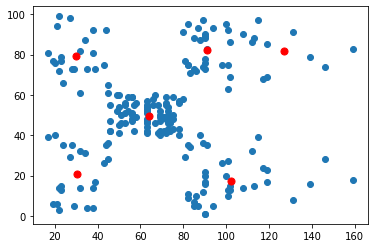

In [ ]:
# Executando KMeans com 6 clusters

kmeans = KMeans(n_clusters=6, init="k-means++", n_init=10, max_iter=300)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:, 0], X2[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')

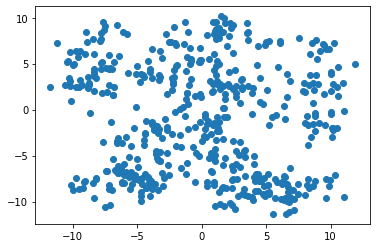

In [ ]:
# Gera um conjunto aleatório de bolhas(as bolinhas azuis) o método de Gauss (WCSS)
X, y = make_blobs(n_samples=500, centers=50, random_state=0)
# n_samples = número de bolhas igualmente divididas entre os clusters
# centers = número de centros a gerar
# random_state = determina aleatoriamente a geração do número para criação do dataset

plt.scatter(X[:,0], X[:, 1])

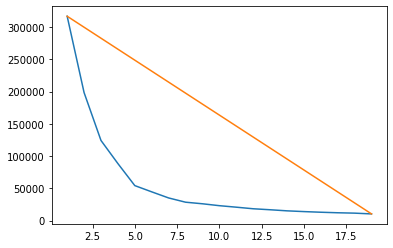

In [ ]:
# Exibição da curva do cotovelo, mostrando as iterações e o número ideal de clusters

# Função de cálculo do quadrado das distâncias
wcss = []

# Loop para aproximar do valor ideal de clusters onde o range será armazendo em 'i' que será usado para testar os cluster em n_clusters
for i in range (1, 20):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
  kmeans.fit_predict(X2)
  wcss.append(kmeans.inertia_)
  # A append agrega o valor obtido dentro da variável wcss
  # A intertia_ retorna a soma dos quadrados das distâncias mais próxima do centróide para em relação a todos os centróides do cluster
  
plt.plot(range(1, 20), wcss) # Plota o loop no eixo x e os valores de wcss no eixo y
plt.plot([1, 19], [wcss[0], wcss[len(wcss)-1]]) # Plota a distância entre os extremos da curva 'cotovelo'. 
# Len retorna o tamanho de uma lista ou objeto
# [1, 19] é a distância do range
# len(wcss)-1 diz para o algoritmo não ultrapassar o tamanho do range (que é 19), onde o -1 serve para dizer que 19 é o limite
# não estrapolando esse valor.



44532.0999700246
[[125.27272727  82.72727273]
 [ 64.09876543  49.51851852]
 [ 29.77272727  79.36363636]
 [ 30.43478261  20.91304348]
 [102.11428571  17.11428571]
 [ 90.32142857  81.89285714]]
44532.0999700246


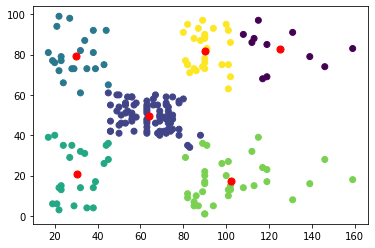

In [ ]:
# Execução do K-means com o número ideal de clusters

kmeans = KMeans(n_clusters=6, init="k-means++", n_init=10, max_iter=300)
pred_y = kmeans.fit_predict(X2)
s = kmeans.inertia_
print(s.sum())
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

plt.scatter(X2[:, 0], X2[:, 1], c = pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')

